## Rainfall in Germany
**Import**

In [76]:
import numpy as np
import matplotlib.pyplot as plt
import pandas

**Load dataset**
"Zeitreihen fuer Gebietsmittel fuer Bundeslaender und Kombinationen von Bundeslaender, erstellt am: 20221002"

In [77]:
dataframe_rainfall = pandas.read_csv('regional_averages_rr_year.txt', sep=';')
print(dataframe_rainfall)

     Jahr Jahr2  Brandenburg/Berlin  Brandenburg  Baden-Wuerttemberg  Bayern  \
0    1881  year               521.3        521.0               828.6   804.9   
1    1882  year               673.6        673.0              1255.2  1085.3   
2    1883  year               500.6        500.3               870.5   832.4   
3    1884  year               635.4        634.3               776.4   797.2   
4    1885  year               550.2        549.7               990.9   830.2   
..    ...   ...                 ...          ...                 ...     ...   
136  2017  year               721.4        719.1               957.1   968.1   
137  2018  year               390.4        390.3               765.0   757.3   
138  2019  year               505.4        504.6               932.6   860.5   
139  2020  year               511.1        511.4               816.0   861.0   
140  2021  year               600.1        600.6               980.9   962.8   

     Hessen  Mecklenburg-Vorpommern  Ni

**Delete obsolete data**

In [78]:
del dataframe_rainfall['Jahr2']

dataframe_rainfall.rename({"Unnamed: 19":"a"}, axis="columns", inplace=True)
del dataframe_rainfall['a']

**Delete not clearly defined data**

In [79]:
del dataframe_rainfall['Brandenburg/Berlin']
del dataframe_rainfall['Niedersachsen/Hamburg/Bremen']
del dataframe_rainfall['Thueringen/Sachsen-Anhalt']
print(dataframe_rainfall)

     Jahr  Brandenburg  Baden-Wuerttemberg  Bayern  Hessen  \
0    1881        521.0               828.6   804.9   649.5   
1    1882        673.0              1255.2  1085.3  1005.1   
2    1883        500.3               870.5   832.4   656.8   
3    1884        634.3               776.4   797.2   699.4   
4    1885        549.7               990.9   830.2   691.8   
..    ...          ...                 ...     ...     ...   
136  2017        719.1               957.1   968.1   836.0   
137  2018        390.3               765.0   757.3   576.4   
138  2019        504.6               932.6   860.5   728.8   
139  2020        511.4               816.0   861.0   656.5   
140  2021        600.6               980.9   962.8   743.1   

     Mecklenburg-Vorpommern  Niedersachsen  Nordrhein-Westfalen  \
0                     494.5          643.5                792.1   
1                     568.5          758.8               1032.1   
2                     518.9          620.4            

**Plot data for Germany**

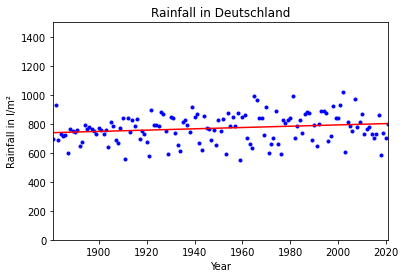

In [89]:
region='Deutschland'
x=dataframe_rainfall['Jahr']
y=dataframe_rainfall[region]
plt.scatter(x, y, marker='.', color='b')

# Set the title
plt.title('Rainfall in ' + region)
# Set the y-axis label
plt.ylabel('Rainfall in l/m²')
# Set the x-axis label
plt.xlabel('Year')
# Set axis range
plt.axis([dataframe_rainfall['Jahr'].min(), dataframe_rainfall['Jahr'].max(), 0, 1500])
#add linear regression line to scatterplot 
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x+b, color='r')
plt.show()

**Plot for federal states**

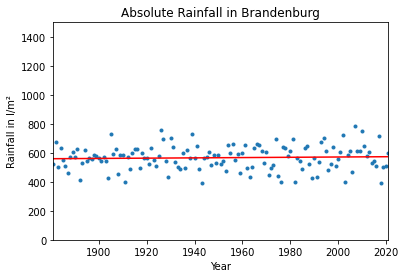

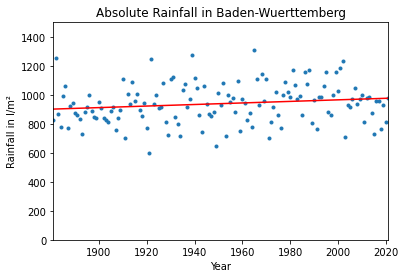

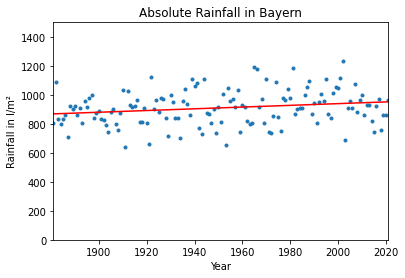

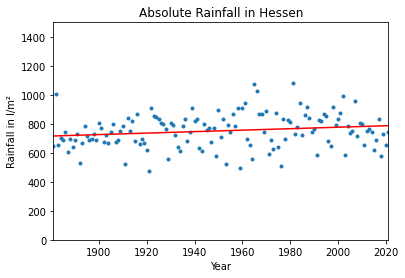

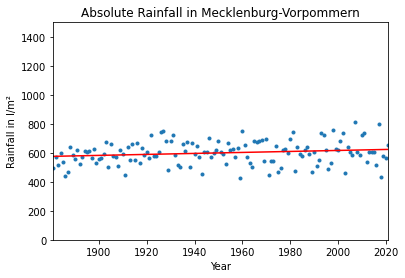

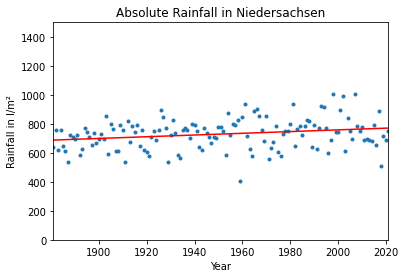

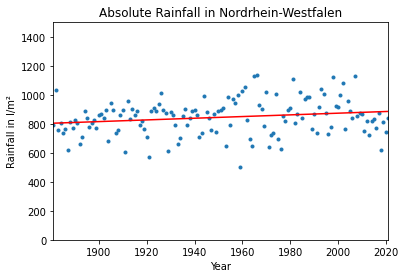

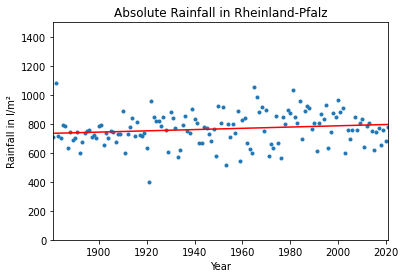

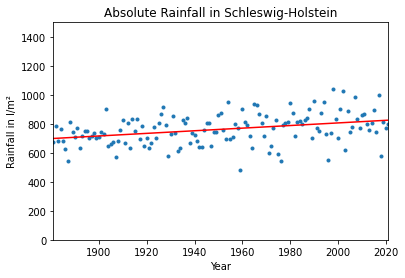

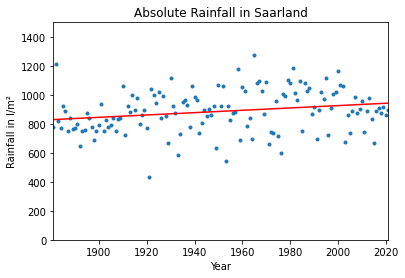

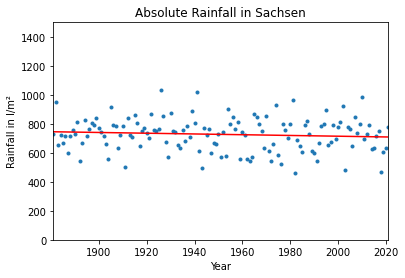

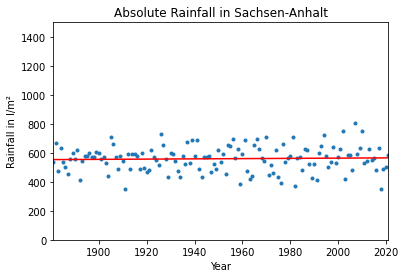

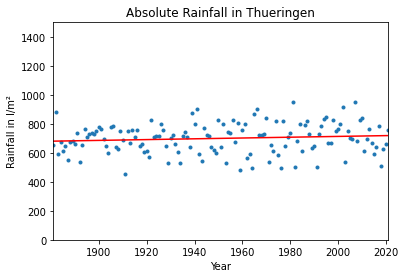

In [132]:
for column in dataframe_rainfall:
    if column not in ['Jahr', "Deutschland"]:
        plt.title('Absolute Rainfall in '+ column)
        # Set the y-axis label
        plt.ylabel('Rainfall in l/m²')
        # Set the x-axis label
        plt.xlabel('Year')
        # Set axis range
        plt.axis([dataframe_rainfall['Jahr'].min(), dataframe_rainfall['Jahr'].max(), 0, 1500])
        region=column
        x=dataframe_rainfall['Jahr']
        y=dataframe_rainfall[region]
        plt.scatter(x, y, marker='.', label=region)
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x+b, color='r')
        plt.show()



**Analysis of Extremes**

In [82]:
max_rain=0
max_region=''
min_rain=2000
min_region=''
for column in dataframe_rainfall:
    if column not in ['Jahr', "Deutschland"]:
        if dataframe_rainfall[column].max()>max_rain:
            max_rain=dataframe_rainfall[column].max()
            max_region=column
        if dataframe_rainfall[column].min()<min_rain:
            min_rain=dataframe_rainfall[column].min()
            min_region=column
max_year=(dataframe_rainfall.loc[dataframe_rainfall[max_region] == max_rain, 'Jahr'])
max_year=int(max_year.iloc[0])
print(max_region + ' had the most rainfall in ' + str(max_year) + ' with ' + str(max_rain) + 'l/m².')

min_year=(dataframe_rainfall.loc[dataframe_rainfall[min_region] == min_rain, 'Jahr'])
min_year=int(min_year.iloc[0])
print(min_region + ' had the least rainfall in ' + str(min_year) + ' with ' + str(min_rain) + 'l/m².')


Baden-Wuerttemberg had the most rainfall in 1965 with 1312.2l/m².
Sachsen-Anhalt had the least rainfall in 2018 with 352.5l/m².


**Separate dataset for rainfall relative to Germany in total**

In [72]:
dataframe_rainfall_percentage=dataframe_rainfall.copy()

for column in dataframe_rainfall_percentage:
    if column not in ['Jahr', "Deutschland"]:
        dataframe_rainfall_percentage[column] = dataframe_rainfall_percentage[column] / (dataframe_rainfall_percentage["Deutschland"])
        
del dataframe_rainfall_percentage['Deutschland']
print(dataframe_rainfall_percentage)

     Jahr  Brandenburg  Baden-Wuerttemberg    Bayern    Hessen  \
0    1881     0.751262            1.194809  1.160634  0.936554   
1    1882     0.726233            1.354484  1.171145  1.084601   
2    1883     0.728027            1.266735  1.211292  0.955763   
3    1884     0.866293            1.060366  1.088774  0.955203   
4    1885     0.765173            1.379315  1.155624  0.962973   
..    ...          ...                 ...       ...       ...   
136  2017     0.837429            1.114592  1.127402  0.973565   
137  2018     0.665700            1.304793  1.291660  0.983114   
138  2019     0.686531            1.268844  1.170748  0.991565   
139  2020     0.725493            1.157611  1.221450  0.931338   
140  2021     0.749719            1.224441  1.201847  0.927600   

     Mecklenburg-Vorpommern  Niedersachsen  Nordrhein-Westfalen  \
0                  0.713050       0.927902             1.142177   
1                  0.613467       0.818819             1.113737   
2     

**Plot for linear regression of relative rainfall**

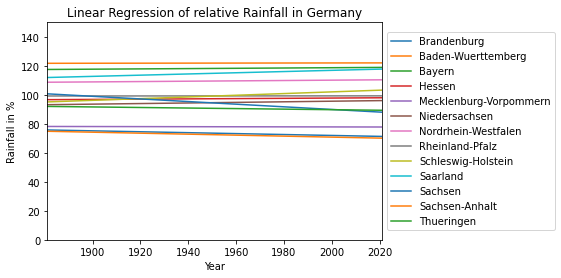

Greatest change is predicted through linear regression for Sachsen of 0.09 %-points/year.


In [134]:
# Set the title
plt.title('Linear Regression of relative Rainfall in Germany')
# Set the y-axis label
plt.ylabel('Rainfall in %')
# Set the x-axis label
plt.xlabel('Year')
# Set axis range
plt.axis([dataframe_rainfall_percentage['Jahr'].min(), dataframe_rainfall_percentage['Jahr'].max(), 0, 150])

max_linear_change=0
max_linear_region=''

for column in dataframe_rainfall_percentage:
    if column not in ['Jahr', "Deutschland"]:
        region=column
        x=dataframe_rainfall_percentage['Jahr']
        y=dataframe_rainfall_percentage[region]*100
        m, b = np.polyfit(x, y, 1)
        plt.plot(x, m*x+b, label=region)
        
        #print(region+' has a rate of change of ' + str(m) + ' percent-points')
        if max_linear_change<(np.sqrt(m**2)):
            max_linear_change=(np.sqrt(m**2))
            max_linear_region=region
            
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
'''
Legend below plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
'''
plt.show()

print('Greatest change is predicted through linear regression for '+ max_linear_region + ' of ' + str(round(max_linear_change, 2)) + ' %-points/year.')